# Daten-Analyse Next-Bike

## Strukturierung der Daten

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [2]:
#Import umgewandelte Tabelle
df = pd.read_csv('datatable.csv')

In [3]:
df.head()

,placeUid,lng,SID,cityName,cityUid,bikeNumber,countryCode,removeFeature,inUse,id,placeName,lat,timestamp,_headers
0,45273339.0,6.940357,0be6b4c2-b58f-4efd-8eac-9e3d116b92ce,Köln,14,21096,DE,False,False,bike_21096,BIKE 21096,50.943472,2021-06-14T12:29:23.796Z,KvbNextBikeEventType
1,45273339.0,6.940357,0be6b4c2-b58f-4efd-8eac-9e3d116b92ce,Köln,14,21096,DE,False,False,bike_21096,BIKE 21096,50.943472,2021-06-14T12:32:23.797Z,KvbNextBikeEventType
2,45273339.0,6.940357,0be6b4c2-b58f-4efd-8eac-9e3d116b92ce,Köln,14,21096,DE,False,False,bike_21096,BIKE 21096,50.943472,2021-06-14T12:59:23.905Z,KvbNextBikeEventType
3,47064624.0,6.924845,c96ed83f-4f5e-4776-8b5f-daa7fa3d8357,Köln,14,220001,DE,False,False,bike_220001,BIKE 220001,50.917920,2021-06-14T12:38:23.825Z,KvbNextBikeEventType
4,NaN,0.000000,c5a92d83-b120-4006-a4fb-2161f97fcc2e,Köln,14,220033,DE,False,True,bike_220033,NaN,0.000000,2021-06-14T12:32:23.820Z,KvbNextBikeEventType


In [4]:
df.isnull().sum()

placeUid         4909
lng                 0
SID                 0
cityName            0
cityUid             0
bikeNumber          0
countryCode         0
removeFeature       0
inUse               0
id                  0
placeName        4909
lat                 0
timestamp           0
_headers            0
dtype: int64

NaN-Werte treten also ausschließlich in "placeUid" und "placeName" auf. Ein erster Blick auf die Werte lässt, vermuten, dass die NaN-Werte auf eine Nutzung des Fahrrads hinweisen.
Die nächste Zeile bestätigt dies.

In [5]:
df[df['placeUid'].isnull()]['inUse'].value_counts()

True    4909
Name: inUse, dtype: int64

Als nächstes soll die Aussagekraft der einzelnen Spalten untersucht werden.

In [6]:
df.nunique()

placeUid         1744
lng              2355
SID              1439
cityName            1
cityUid             1
bikeNumber       1439
countryCode         1
removeFeature       1
inUse               2
id               1439
placeName        1349
lat              2090
timestamp         839
_headers            1
dtype: int64

In [7]:
#Die Zellen mit konstanten Werten haben für die spätere Analyse keine Aussagekraft.
df.drop(['cityName','cityUid','countryCode','removeFeature','_headers'],axis=1,inplace=True)

In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 46035 entries, 0 to 46034
Data columns (total 9 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   placeUid    41126 non-null  float64
 1   lng         46035 non-null  float64
 2   SID         46035 non-null  object 
 3   bikeNumber  46035 non-null  int64  
 4   inUse       46035 non-null  bool   
 5   id          46035 non-null  object 
 6   placeName   41126 non-null  object 
 7   lat         46035 non-null  float64
 8   timestamp   46035 non-null  object 
dtypes: bool(1), float64(3), int64(1), object(4)
memory usage: 2.9+ MB


In [9]:
print(df['placeName'].nunique(),'\n')
print(df['placeUid'].nunique())

1349 

1744


Die Namen "placeName" und "placeUid" lassen auf eine direkte Abhängigkeit der beiden schließen. Durch die unterschiedliche Anzahl an Werten, werden diese jedoch als unabhängig betrachtet.

In [10]:
#Extrahierung wichtiger Informationen aus der "timestamp"-Spalte
df['timestamp'] = pd.to_datetime(df['timestamp'])

df['hour'] = df['timestamp'].apply(lambda h: h.hour)
df['minute'] = df['timestamp'].apply(lambda m: m.minute)
df['time'] = df['timestamp'].apply(lambda t: t.time())
df['hour_min'] = df['timestamp'].apply(lambda hm: hm.hour + hm.minute/60)

## Daten-Analyse

<AxesSubplot:xlabel='hour', ylabel='count'>

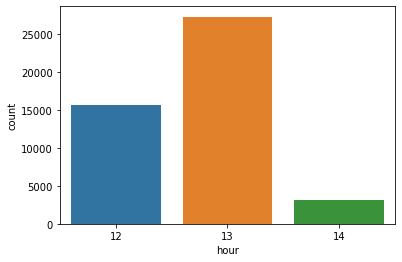

In [11]:
#Verteilung der gemessenen Daten über den Zeitraum
sns.countplot(x='hour',data=df)#,hue='bikeNumber')

<AxesSubplot:xlabel='hour', ylabel='count'>

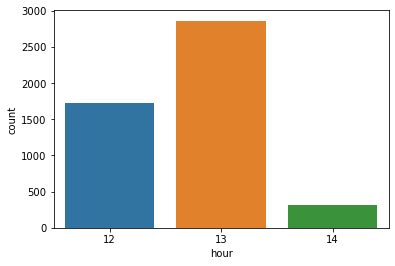

In [12]:
#Benutzte Fahrräder im Zeitraum
sns.countplot(x='hour',data=df[df['inUse']==True])

In [13]:
print('Messstart: ',df['time'].min(),'\n')
print('Messende: ',df['time'].max())

Messstart:  12:29:23.796000 

Messende:  14:08:23.912000


Da die Messungen zwischen halb 1 und 10 nach 2 gemacht wurden, ist es logisch, dass die meisten Werte in das 13-Uhr-Fenster fallen. Interessant ist, jedoch, dass die benutzten Fahrräder im gleichen Zeitraum gleichermaßen angesiedelt sind. Das lässt darauf schließen, dass die Anzahl benutzter Fahrräder von der Gesamtzahl konstant ist.

<AxesSubplot:xlabel='hour_min', ylabel='count'>

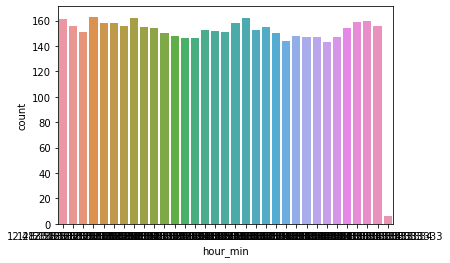

In [14]:
#Verteilung der Messungen über den Zeitraum.
sns.countplot(x='hour_min',data=df[df['inUse']==True])

(50.84, 51.03)

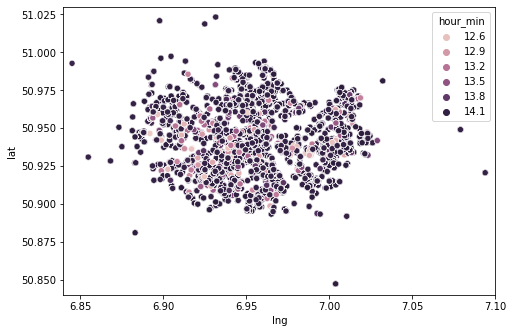

In [15]:
#Vergleich der Fahrradposition in Abhängigkeit des gemessenen Zeitpunkts.
fig = plt.figure()
ax = fig.add_axes([0,0,1,1])
sns.scatterplot(x='lng',y='lat',data=df,hue='hour_min')
#Nur der relevante Bereich wird angezeigt.
ax.set_xlim([6.84, 7.1])
ax.set_ylim([50.84, 51.03])

Aus dieser Abbildung lassen sich bereits einige Aussagen ableiten. Jedoch werden bei stehenden Fahrrädern mehrere Zeitpunkte genau übereinanderliegen. Die "14-Uhr-Fahrräder" in der Abbildung werden zu einem Großteil daher Unbewegte sein. Jedoch kann man aus dieser Abbildung erkennen, welche Fahrräder früh bewegt werden.

Aus diesem Grund soll als nächstes untersucht werden, welche Fahrräder überhaupt benutzt werden in dem untersuchten Zeitraum.

In [25]:
#df[df['lng']>df['lng'].min()]['lng'].min()

In [26]:
#df[df['lng']==df['lng'].max()]

In [27]:
#df[df['bikeNumber']==220182]

In [16]:
#Benutzte Fährrader
bikes_total = df['bikeNumber'].nunique()#value_counts()
bikes_used = df[df['inUse']==True]['bikeNumber'].nunique()
print(round(bikes_used/bikes_total*100,2),'% der Fahrräder wurden im untersuchten Zeitraum mindestens einmal genutzt.')

29.67 % der Fahrräder wurden im untersuchten Zeitraum mindestens einmal genutzt.


In [17]:
#Alle Fahrräder, die mindestens einmal benutzt werden.
usedBikes = df[df['inUse']==True]['bikeNumber'].unique()

#Funktion zur Abfrage
def used(BikeNo):
    if BikeNo in usedBikes:
        return 1
    else:
        return 0

In [18]:
df['used'] = df['bikeNumber'].apply(lambda no: used(no))

In [19]:
#Die Berechnungen der Benutzten Fahrräder stimmen so überein.
print(bikes_used,'\n')
print(df[df['used']==1]['bikeNumber'].nunique())

427 

427


(50.84, 51.03)

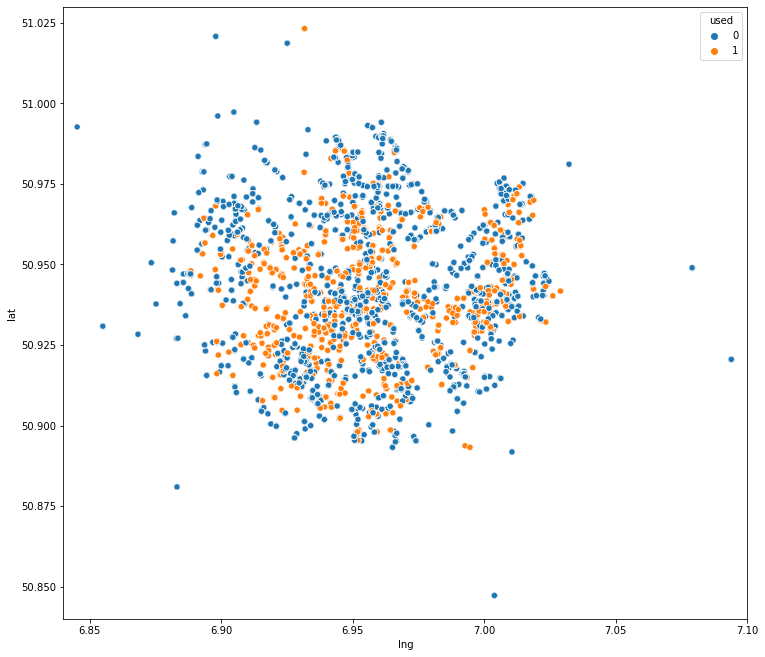

In [20]:
#Plot der benutzten Fahrräder
fig = plt.figure(figsize=(9.5,8.5))
ax = fig.add_axes([0,0,1,1])
sns.scatterplot(x='lng',y='lat',data=df,hue='used')
ax.set_xlim([6.84, 7.1])
ax.set_ylim([50.84, 51.03])

In [21]:
#Interessant ist jedoch noch, wie oft ein Fahrrad benutzt wurde.
use_count = pd.DataFrame(df['bikeNumber'].unique(),columns=['BikeNo'])
use_count['count'] = np.zeros(df['bikeNumber'].nunique())

In [235]:
#Alte Berechnung

#for cc in df.index:
#    if df['bikeNumber'][cc] in usedBikes:
#        use_count.loc[use_count['BikeNo']==df['bikeNumber'][cc],'count'] = use_count.loc[use_count['BikeNo']==df['bikeNumber'][cc],'count']+1

In [22]:
#Anzahl an verschiedenen Positionsdaten (Breitengrad genügt wohl) gibt Ausschluss über die Anzahl an Nutzungen.
for cc in df['bikeNumber'].unique():
    use_count.loc[use_count['BikeNo']==cc,'count'] = df[df['bikeNumber']==cc]['lat'].nunique()

In [23]:
use_count.head()

,BikeNo,count
0,21096,1.0
1,220001,1.0
2,220033,4.0
3,220341,1.0
4,220342,3.0


In [24]:
#Der Zähler wird in ein Dictionary umgewandelt. Dafür wird zunächst die Fahrradnr. als Index festgelegt.
use_count.set_index('BikeNo',inplace=True)
count_dict = use_count.to_dict()

In [25]:
#Mit diesem Dictionary lässt sich im "Haupt"-DataFrame der Zählerwert auf die Nr. projezieren.
df['use_count'] = df['bikeNumber'].map(count_dict['count'])

(50.84, 51.03)

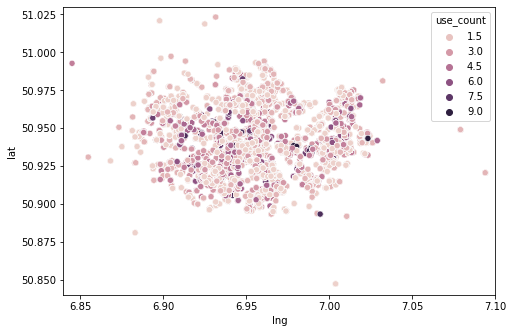

In [26]:
fig = plt.figure()
ax = fig.add_axes([0,0,1,1])
sns.scatterplot(x='lng',y='lat',data=df,hue='use_count')
ax.set_xlim([6.84, 7.1])
ax.set_ylim([50.84, 51.03])

Zuletzt soll noch einmal ein Blick auf die Korrelationen gerichtet werden. Hieraus können sich weitere Zusammenhänge (wie beispielsweise zwischen "placeUid" und Positionsdaten) ableiten.

In [27]:
df.corr()

,placeUid,lng,bikeNumber,inUse,lat,hour,minute,hour_min,used,use_count
placeUid,1.000000,-0.601233,0.290568,NaN,-0.298309,0.005902,0.006714,0.011159,0.148597,0.151876
lng,-0.601233,1.000000,0.049206,-0.997675,0.997716,0.008466,-0.002579,0.008510,-0.532967,-0.046512
bikeNumber,0.290568,0.049206,1.000000,-0.049277,0.049276,-0.000267,0.000514,-0.000003,-0.019026,0.026842
inUse,NaN,-0.997675,-0.049277,1.000000,-0.999999,-0.008450,0.002516,-0.008531,0.533050,0.045510
lat,-0.298309,0.997716,0.049276,-0.999999,1.000000,0.008456,-0.002519,0.008536,-0.533133,-0.045582
hour,0.005902,0.008466,-0.000267,-0.008450,0.008456,1.000000,-0.545409,0.857530,-0.007769,-0.004684
minute,0.006714,-0.002579,0.000514,0.002516,-0.002519,-0.545409,1.000000,-0.036522,0.004614,0.002942
hour_min,0.011159,0.008510,-0.000003,-0.008531,0.008536,0.857530,-0.036522,1.000000,-0.006432,-0.003778
used,0.148597,-0.532967,-0.019026,0.533050,-0.533133,-0.007769,0.004614,-0.006432,1.000000,0.607807
use_count,0.151876,-0.046512,0.026842,0.045510,-0.045582,-0.004684,0.002942,-0.003778,0.607807,1.000000


(50.84, 51.03)

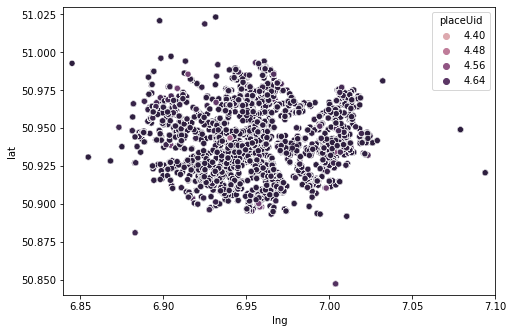

In [28]:
fig = plt.figure()
ax = fig.add_axes([0,0,1,1])
sns.scatterplot(x='lng',y='lat',data=df,hue='placeUid')
ax.set_xlim([6.84, 7.1])
ax.set_ylim([50.84, 51.03])

# Genaue Visualisierung

In [29]:
#Mit der Stadtkarte von OpenStreetMap
colognemap = plt.imread('map.png')

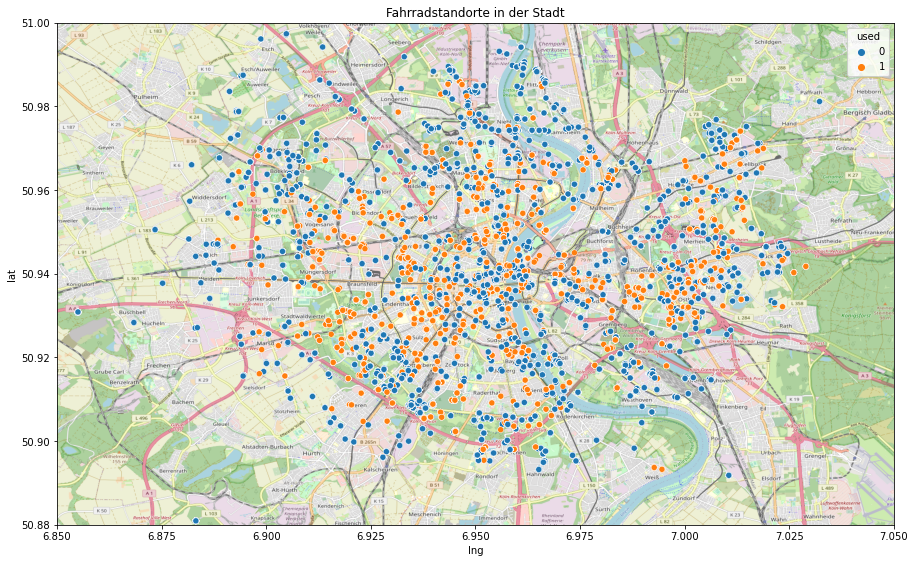

In [30]:
fig, ax = plt.subplots(figsize = (15,15))
sns.scatterplot(x='lng',y='lat',data=df,hue='used')
ax.set_title('Fahrradstandorte in der Stadt')
ax.set_xlim([6.85, 7.05])
ax.set_ylim([50.88, 51])
ax.imshow(colognemap, zorder=0, extent = (6.85, 7.05, 50.88, 51), aspect= 'equal')

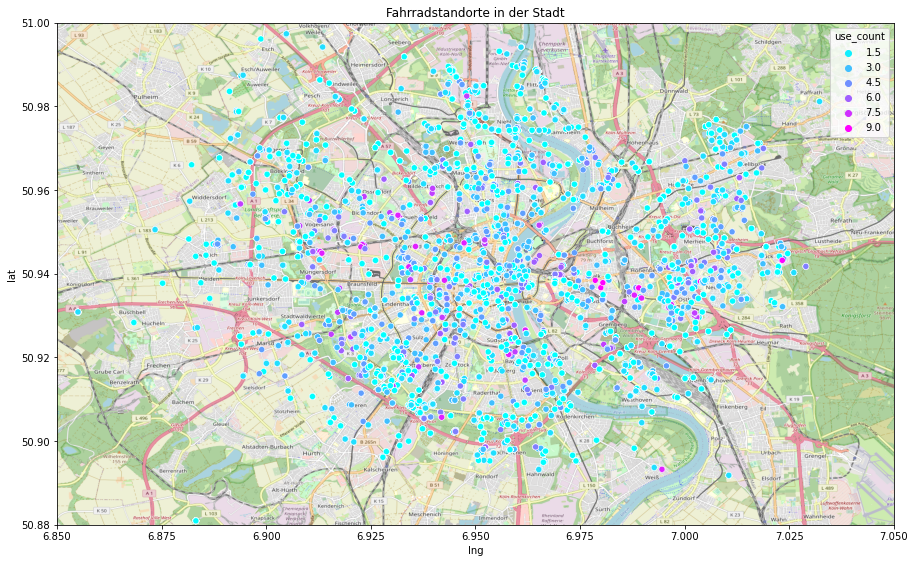

In [31]:
fig, ax = plt.subplots(figsize = (15,15))
sns.scatterplot(x='lng',y='lat',data=df,hue='use_count',palette='cool')
ax.set_title('Fahrradstandorte in der Stadt')
ax.set_xlim([6.85, 7.05])
ax.set_ylim([50.88, 51])
ax.imshow(colognemap, zorder=0, extent = (6.85, 7.05, 50.88, 51), aspect= 'equal')

In [ ]:
#df['bikeNumber'].value_counts().tail(20)